In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import scipy
plt.rcParams["figure.figsize"] = (7,4)

To explore the simulated data of the Large Hedron Collider we will plot each of the signal variables against their corresponding backgrond (QCD) values. Here are the definitions of the variables that we will be exploring:

pt: transverse momentum of jet

eta: pseudorapidity

phi: azimuthal angle around beam

mass: mass in GeV

ee2: energy correlations between 2 jets

ee3: energy correlations between 3 jets

d2: two prong jet disriminant, calculated by $ (\frac{ee_2}{ee_3})^3 $

angularity: describes shape of the jet

t1: (subjettiness) variance of detections for 1 branch coming from a jet

t2: variance of detections for 2 branches coming from a jet

t3: variance of detections for 3 branches coming from a jet

t21: ratio od t2 and t1

t32: ratio of t3 and t2

KtDeltaR: size difference between two sub jets

In [2]:
infile = open ("higgs_100000_pt_250_500.pkl", 'rb')
data_signal = pickle.load(infile)

signal = pd.DataFrame(data_signal)
signal.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [3]:
infile2 = open ("qcd_100000_pt_250_500.pkl", 'rb')
data_bg = pickle.load(infile2)

background = pd.DataFrame(data_bg)
background.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [4]:
# Print two variables, mass and d2, of the first 10 jets
for i in range(10):
    print(data_signal['mass'][i],data_signal['d2'][i])

125.15036485403486 1.2980200835589373
130.55267214662751 1.445626317832899
125.70306309880351 0.986596849742669
126.21585336608149 1.2184665392866647
132.18250371689544 1.2917844364435773
125.67653506886116 0.4343656746345235
127.65400794990293 0.9312049446719695
124.16656852260293 0.9493560863407668
122.13035265114684 3.0022665455324082
125.19144633816678 0.5539996032675585


In [5]:
data_signal.head(5)

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118


In [6]:
def plot_data(key, ylabel):
    plt.hist(signal[key], bins = 500, density = True, alpha = .5)
    plt.xlabel('Signal ' + key)
    plt.ylabel(ylabel)
    plt.show()
    plt.hist(background[key], bins = 500, density = True, alpha = .5)
    plt.xlabel('Background ' + key)
    plt.ylabel(ylabel)
    plt.show()

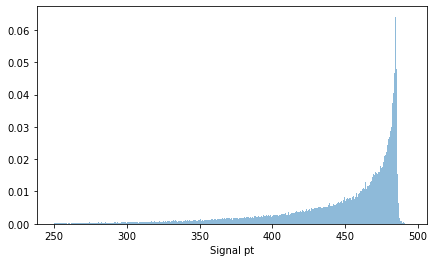

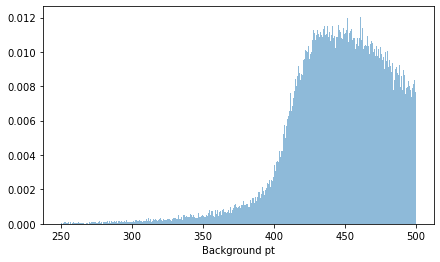

In [7]:
plot_data('pt', '')

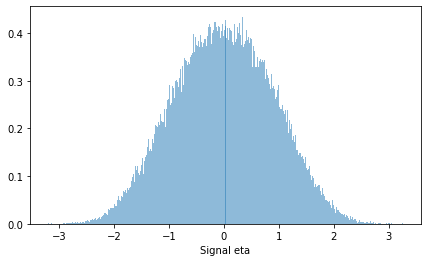

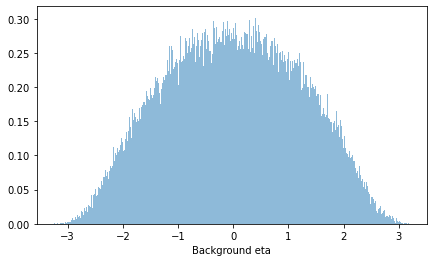

In [8]:
plot_data('eta', '')

This distributions makes sense for pseudorapidity to have a normal distribution with mean 0. This value is a function of theta where $ \mu = 0 $ corresponds to $ \theta = \frac{\pi}{2} $.

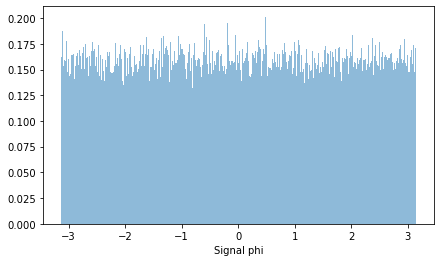

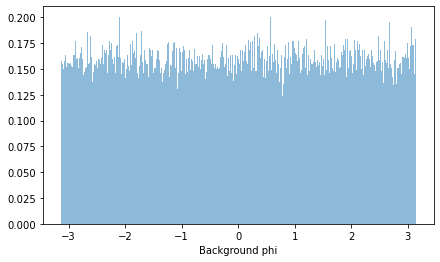

In [9]:
plot_data('phi', '')

No obvious changes between the background and the signal data for phi.

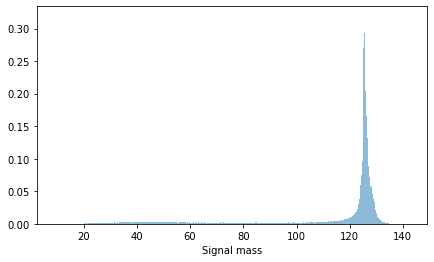

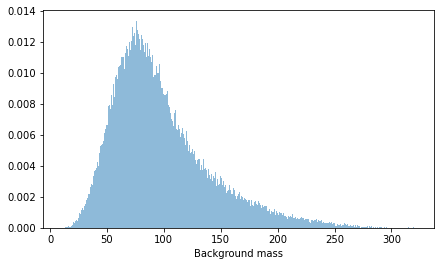

In [10]:
plot_data('mass', '')

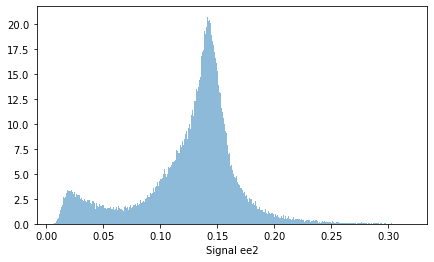

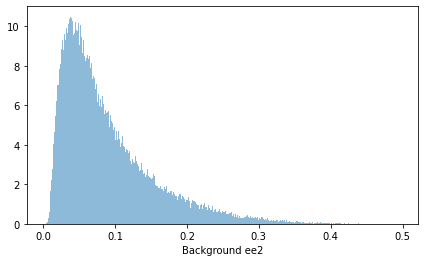

In [11]:
plot_data('ee2', '')

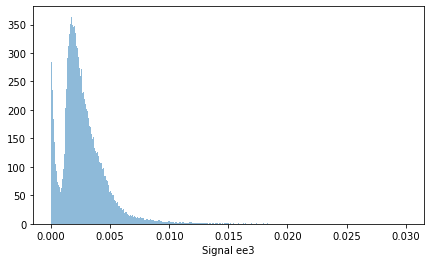

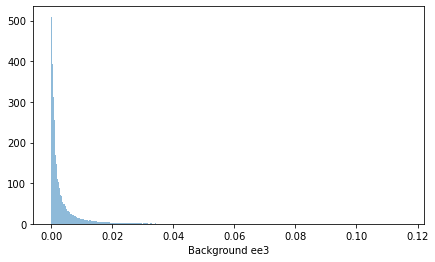

In [12]:
plot_data('ee3', '')

ee2 and ee3 both have 2 peaks in their signal data distribution, and all 4 signal and data distributions are skewed right. 

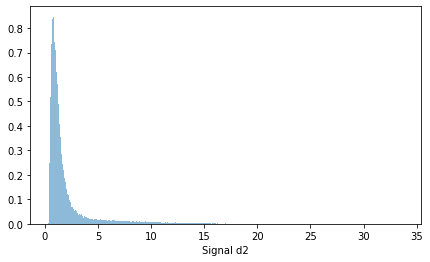

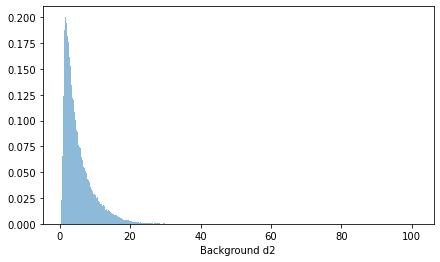

In [13]:
plot_data('d2', '')

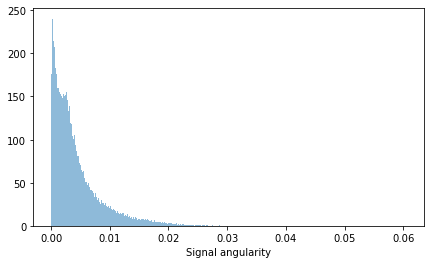

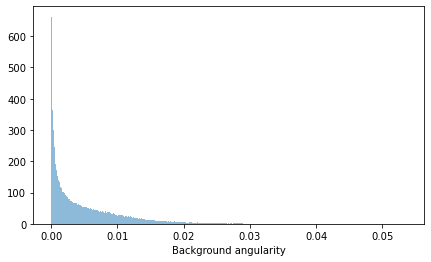

In [18]:
plot_data('angularity', '')

d2 and angularity both have sharp peaks are are skewed right.

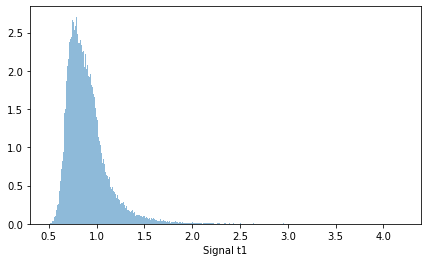

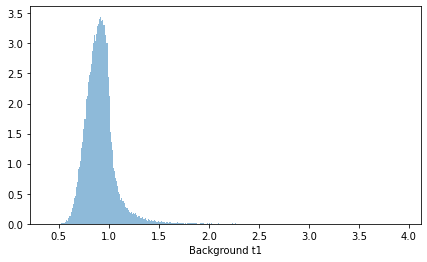

In [14]:
plot_data('t1', '')

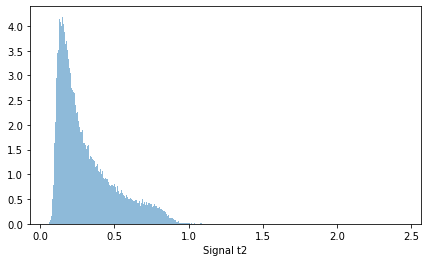

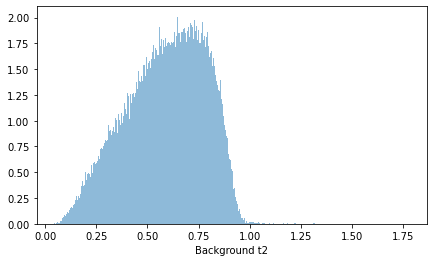

In [15]:
plot_data('t2', '')

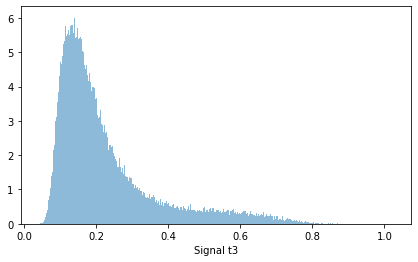

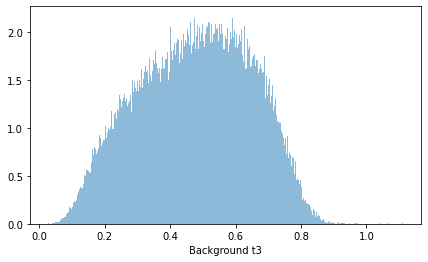

In [16]:
plot_data('t3', '')

t2 and t3 have visually similar distributions for the background and signal data. 

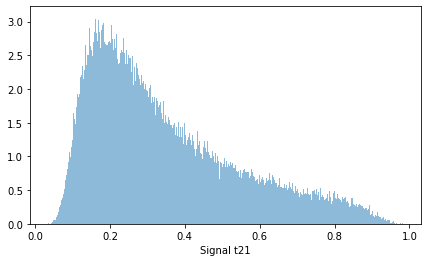

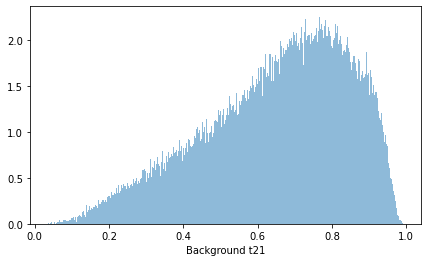

In [21]:
plot_data('t21', '')

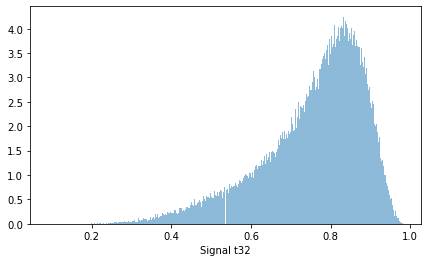

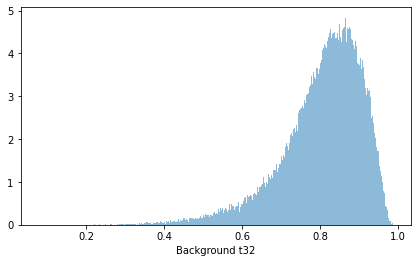

In [17]:
plot_data('t32', '')

t21 and t32 appear related to the other tn distributions, which should be the case because they are ratios of one another. 

plot_data('KtDeltaR', '')

KdeltaR looks similar to ee2 and ee3 distriubtions, they could be related somehow. 

### Compute the expected discovery sensitivity (significance of the expected signal) by normalizing each sample appropriately (see 'expected yields' below).

The expected yields of our dataset indiciate that with 20,000 jets we would see 100 true signals: $ N_{Higgs} = 100 $ and $ N_{QCD} = 20,000 $. Since the signals are discrete and independent we know the background to Poisson distributed with $ \lambda = 20,000 $ jets. Since the $ N_{Higgs} = 100 $ then this means that with $ \lambda $ + $ N_{Higgs} $ would give us an expected Higgs Boson signal. 

In [25]:
lam = 20000
signal = 20100

probability = stats.poisson.sf(signal, lam)
sigma = stats.norm.isf(probability)
print('The significance of a 20,100 signal is ' , sigma, 'sigma.')

The significance of a 20,100 signal is  0.7112259282313185 sigma.


This is not very significant, we would need a sigma value of 5 or more to be considered significant. We can try to find what signal would give us a 5 sigma discovery.

In [15]:
sigma_new = 5
probability_new = stats.norm.sf(sigma_new)
signal_new = stats.poisson.isf(probability_new, lam)
print('In order to find a 5 sigma discovery we would need', signal_new, 'jets')

In order to find a 5 sigma discovery we would need 20711.0 jets


Let's check if this is correct:

In [27]:
signal2 = 20711

probability = stats.poisson.sf(signal2, lam)
sigma = stats.norm.isf(probability)
print('The significance of a 21,000 signal is ' , sigma, 'sigma.')

The significance of a 21,000 signal is  5.002840020760749 sigma.


### Develop a plan to optimize the discovery sensitivity by applying selections to these features.

To optimize discovery sensitivity it might make sense to compare the background and signal distributions to decide if we can remove some of the background data that lies outside the signal range. If we change the range of data that means we have to calculate the new expected yields of the data. 